<a href="https://colab.research.google.com/github/srikant-ai/Deep_Learning_TensforFlow/blob/main/Nueral_network_Regression_with_tensorflow_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Regression with Nueral networks in TensorFlow.

In [1]:
#Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


### Creating data to view and fit

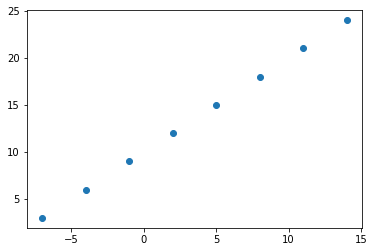

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create Labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# visualize it
plt.scatter(X,y) 

In [5]:
# The Equation we would want aour nueral network to learn 
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [7]:
# Create a Demo Tensor  for Housing Price Prediction Problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [9]:
X[0] , y[0]

(-7.0, 3.0)

In [10]:
X[1] , y[1]

(-4.0, 6.0)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape , output_shape

((), ())

In [14]:
# Scalers : hence no dimension
X[0].ndim 

0

In [15]:
# Turn the numpy array's into tensors
X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape , output_shape

(TensorShape([]), TensorShape([]))

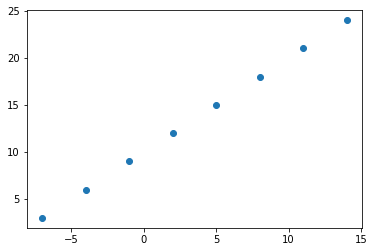

In [17]:
plt.scatter(X,y)

#### Steps in Modellling in TensorFlow :

1. **Creating a model** - Define the input and output Layers , as well as the hidden layers of a deep learning model.
2. **Compiling a model**  - Define the loss function (in other words , the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and the evaluation metrics (whar we can use to interprete the performance of our model).
3. Fitting a model - Letting the Model try to find the patterns between X & y (features and labels)

In [20]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API : This Groups a Linear Stack of Layers into Model
# Method : 1
#-----------
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])


# Method : 2
#-----------
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

#2. Compile the model
model.compile(loss=tf.keras.losses.mae ,# mae -> Mean Absolute Error between Labels and Predictions  : mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.SGD(),# sgd : Stochastic Gradient Descent 
              metrics =[ tf.keras.losses.mae])

#3. Fit the Model
model.fit(X,y,epochs=5) # Epochs tells the model how many time the model has to go through the examples to understand the patterns 

Epoch 1/5
1/1 [==============================] - 0s 209ms/step - loss: 11.5048 - mean_absolute_error: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mean_absolute_error: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mean_absolute_error: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mean_absolute_error: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mean_absolute_error: 10.9748


In [21]:
# check out X and y 
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [23]:
# Try and make a prediction using our model
y_pred=model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [24]:
y_pred + 11

array([[23.71602]], dtype=float32)

### Improving our Model

we can improve our model , by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units, (all called nuerons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate**  of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examaples to learn form.)

In [26]:
# Let's Rebuild our model

# set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API : This Groups a Linear Stack of Layers into Model
# Method : 1
#-----------
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])


# Method : 2
#-----------
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

#2. Compile the model
model.compile(loss=tf.keras.losses.mae ,# mae -> Mean Absolute Error between Labels and Predictions  : mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.SGD(),# sgd : Stochastic Gradient Descent 
              metrics =[ tf.keras.losses.mae])

#3. Fit the Model
model.fit(X,y,epochs=100) # Epochs tells the model how many time the model has to go through the examples to understand the patterns 

Epoch 1/100
1/1 [==============================] - 0s 201ms/step - loss: 11.5048 - mean_absolute_error: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mean_absolute_error: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mean_absolute_error: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mean_absolute_error: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mean_absolute_error: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8423 - mean_absolute_error: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7098 - mean_absolute_error: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mean_absolute_error: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4448 - mean_absolute_error: 10.4448
Epoch 1

In [27]:
# check out X and y 
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [28]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [29]:
# Let's Rebuild our model

# set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API : This Groups a Linear Stack of Layers into Model
# Method : 1
#-----------
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])


# Method : 2
#-----------
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

#2. Compile the model
model.compile(loss=tf.keras.losses.mae ,# mae -> Mean Absolute Error between Labels and Predictions  : mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),# Adam : Best of AdaGrad and RMSProp
              metrics =[ tf.keras.losses.mae])

#3. Fit the Model
model.fit(X,y,epochs=100) # Epochs tells the model how many time the model has to go through the examples to understand the patterns 

Epoch 1/100
1/1 [==============================] - 0s 266ms/step - loss: 11.5048 - mean_absolute_error: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.5003 - mean_absolute_error: 11.5003
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4958 - mean_absolute_error: 11.4958
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.4913 - mean_absolute_error: 11.4913
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.4868 - mean_absolute_error: 11.4868
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4823 - mean_absolute_error: 11.4823
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4778 - mean_absolute_error: 11.4778
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4733 - mean_absolute_error: 11.4733
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 11.4688 - mean_absolute_error: 11.4688
Epoch 10

In [30]:
model.predict([17.0])

array([[11.490996]], dtype=float32)

In [38]:
# Let's Rebuild our model

# set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API : This Groups a Linear Stack of Layers into Model
# Method : 1
#-----------
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation =None),
  tf.keras.layers.Dense(1)
])


# Method : 2
#-----------
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

#2. Compile the model
model.compile(loss=tf.keras.losses.mae ,# mae -> Mean Absolute Error between Labels and Predictions  : mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),# Adam : Best of AdaGrad and RMSProp
              metrics =[ tf.keras.losses.mae])

#3. Fit the Model
model.fit(X,y,epochs=100) # Epochs tells the model how many time the model has to go through the examples to understand the patterns 

Epoch 1/100
1/1 [==============================] - 0s 268ms/step - loss: 13.1820 - mean_absolute_error: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.5071 - mean_absolute_error: 12.5071
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.8279 - mean_absolute_error: 11.8279
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1425 - mean_absolute_error: 11.1425
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4485 - mean_absolute_error: 10.4485
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7427 - mean_absolute_error: 9.7427
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.0218 - mean_absolute_error: 9.0218
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2826 - mean_absolute_error: 8.2826
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.5221 - mean_absolute_error: 7.5221
Epoch 10/100
1/1

In [39]:
model.predict([17.0])

array([[27.216782]], dtype=float32)

### Evaluating a Model

When it comes to evaluation. the Best Way to analyze the results would be to Visualiza the Results.

Its a good idea to visualize:
* The data - what data are we working with ? What does it look like ?
* The Model itself - what does our model look like ?
* The training of a model - how does a model perform while it learns?
* The Predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)

In [1]:
import tensorflow as tf

In [2]:
# Lets create a Bigger Dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [3]:
# Create Labesla for the input Features 
y= X +10 
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

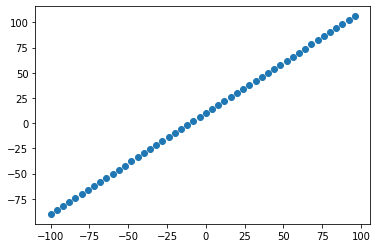

In [10]:
import matplotlib.pyplot as plt
# Visualize the Data

plt.scatter(X,y)

### Lets Divide the Set into the Popular 3 Sets Logic 

* **Training Set** : the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation Set** : the model gets the tuned on this data, which is typically 10-15% of the data available.
* **Test Set** : the model gets evaluated on this data to test what it has learned,  this is typically 10-15% of the total data available.



In [11]:
# check the length the of the input samples we have 
len(X)

50

In [12]:
# Split the data into train and test data.
X_train = X[:40] # first 40 are training sample (80% data)
X_test =  X[40:] # Last 10 are test sample (20% data)

y_train = y[:40] # first 40 are training sample (80% data)
y_test =  y[40:] # Last 10 are test sample (20% data)

len(X_train),len(y_train),len(X_test),len(X_test)

(40, 40, 10, 10)

### Visualizaing the data

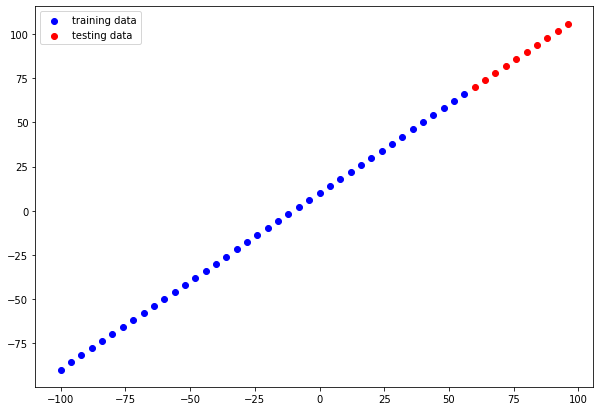

In [13]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train , c='b', label = 'training data')
# Plot testing data in blue
plt.scatter(X_test,y_test , c='r', label = 'testing data')
plt.legend()

In [14]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API : This Groups a Linear Stack of Layers into Model.
# Method : 1
#-----------
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name='Hidden-layer-1'),  # Dense : Fully Connected Layer
  tf.keras.layers.Dense(1 ,name='Output-layer')
], name = 'Model-1')


# Method : 2
#-----------
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

#2. Compile the model
model.compile(loss=tf.keras.losses.mae ,# mae -> Mean Absolute Error between Labels and Predictions  : mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.SGD(),
              metrics =[ tf.keras.losses.mae])
model.summary()

Model: "Model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-layer-1 (Dense)       (None, 10)                20        
_________________________________________________________________
Output-layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total Params : Total number of parameters in the model.
* Trainable Parameters : these are the parameters (patterns) the model can update as it trains.
* Non-Trainable Params : These Parameters aren't updated during training (this is typical when you bring in already learn patterns from other models during **transfer learning**).

In [15]:
#3. Fit the Model
model.fit(X_train,y_train,epochs=100,verbose=0) # Epochs tells the model how many time the model has to go through the examples to understand the patterns 

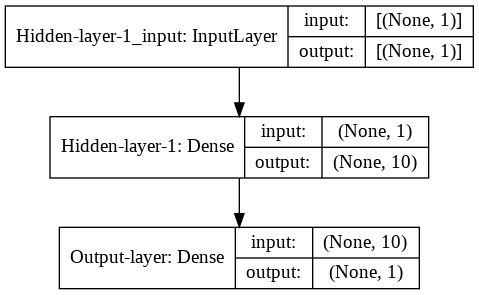

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model=model , show_shapes =True)

### Visualizing our Model's Predictions 

To Visualize Predictions, its a good odea to plot them against the ground truth labels.

Often we will see this is in form of `y_test` or `y_true` versus `y_pred` 

In [17]:
# Make some preidctions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [18]:
# lets create a plotting Function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels , c='b', label = 'training data')
  # Plot testing data in green
  plt.scatter(test_data,test_labels , c='g', label = 'testing data')
  # Plot testing data in red
  plt.scatter(test_data,predictions , c='r', label = 'predictions data')
  plt.legend()


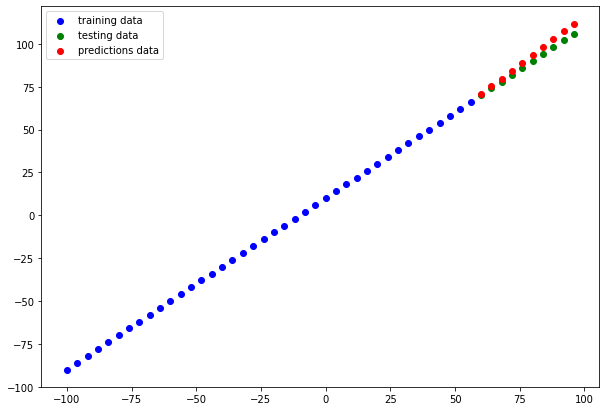

In [19]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

###  Evaluating  our Model's Predictions with Regression Evaluation Metrics

Depending on the Problem you are working on, there will be different evaluation metrics to evaluate your model's performance.

Since we are working on a regression, two main metrics are :
* **MAE** : Mean Absolute Error : "On Average, how wrong is each of my models predictions" 

* **MSE** : Mean Square Error : "Square of the Average Errors"

* **Huber** : Combination of MSE and MAE. Less Sensitive to outliers than MSE.

In [20]:
# Evaluate the Model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 116ms/step - loss: 3.1969 - mean_absolute_error: 3.1969


[3.196942090988159, 3.196942090988159]

In [21]:
# Calculate the Mean absolute Error
tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [22]:
# Calculate the Mean Squared Error
tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [23]:
# Calculate the Huber Loss
hubber_loss=tf.keras.losses.Huber()
hubber_loss(y_test,tf.squeeze(y_pred)).numpy()

2.7069678

In [28]:
 # set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API : This Groups a Linear Stack of Layers into Model.
# Method : 1
#-----------
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1 ,input_shape=[1,],name='Output-layer')
], name = 'Model-1')

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae ,# mae -> Mean Absolute Error between Labels and Predictions  : mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.SGD(),
              metrics =[ tf.keras.losses.mae])
model_1.summary()

Model: "Model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Output-layer (Dense)         (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [29]:
# fit the Model 
model_1.fit(X_train,y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mean_absolute_error: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mean_absolute_error: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mean_absolute_error: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mean_absolute_error: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mean_absolute_error: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mean_absolute_error: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mean_absolute_error: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mean_absolute_error: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mean_absolute_error: 18.7517
Epoch 10/100
2/2 [

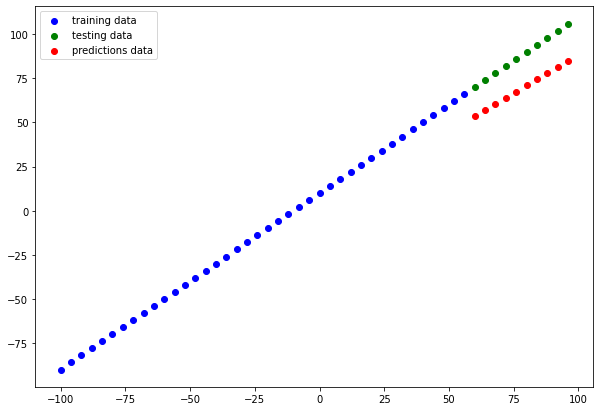

In [30]:
# Make and Plot Predictions using Model-1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [31]:
# Calculate the Mean absolute Error
mae_1=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_1))
# Calculate the Mean Squared Error
mse_1=tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `Model-2`**

* 2 Dense/Fully Connected layers , trained on 100 Epochs

In [32]:
 # set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API : This Groups a Linear Stack of Layers into Model.
# Method : 1
#-----------
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10 ,input_shape=[1,],name='Hidden-layer-1'),
    tf.keras.layers.Dense(1 ,input_shape=[1,],name='Output-layer')
], name = 'Model-2')

#2. Compile the model
model_2.compile(loss=tf.keras.losses.mae ,# mae -> Mean Absolute Error between Labels and Predictions  : mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.SGD(),
              metrics =[ tf.keras.losses.mae])
model_2.summary()

Model: "Model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-layer-1 (Dense)       (None, 10)                20        
_________________________________________________________________
Output-layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [33]:
# fit the Model 
model_2.fit(X_train,y_train, epochs=100, verbose=0)

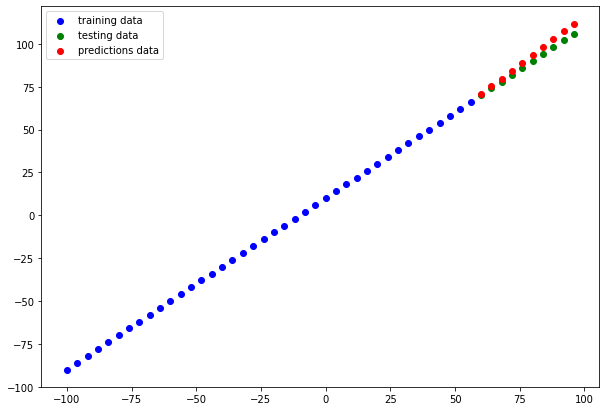

In [34]:
# Make and Plot Predictions using Model-1
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [35]:
# Calculate the Mean absolute Error
mae_2=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_2))
# Calculate the Mean Squared Error
mse_2=tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred_2))
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build `Model-3`**

* 2 Dense/Fully Connected layers , trained on 500 Epochs

In [36]:
 # set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API : This Groups a Linear Stack of Layers into Model.
# Method : 1
#-----------
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10 ,input_shape=[1,],name='Hidden-layer-1'),
    tf.keras.layers.Dense(1 ,input_shape=[1,],name='Output-layer')
], name = 'Model-3')

#2. Compile the model
model_3.compile(loss=tf.keras.losses.mae ,# mae -> Mean Absolute Error between Labels and Predictions  : mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.SGD(),
              metrics =[ tf.keras.losses.mae])
model_3.summary()

Model: "Model-3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-layer-1 (Dense)       (None, 10)                20        
_________________________________________________________________
Output-layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [37]:
# fit the Model 
model_3.fit(X_train,y_train, epochs=500, verbose=0)

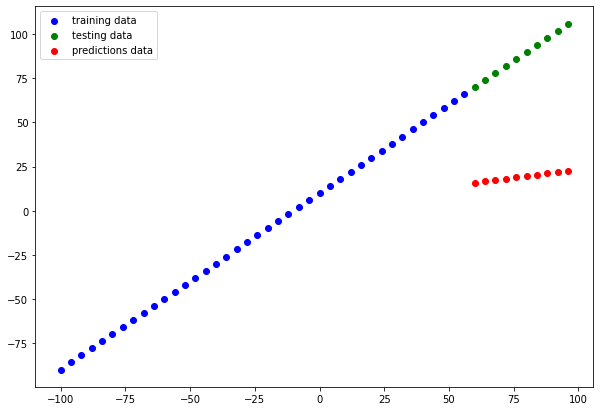

In [38]:
# Make and Plot Predictions using Model-1
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [40]:
# Calculate the Mean absolute Error
mae_3=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred_3))
# Calculate the Mean Squared Error
mse_3=tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred_3))
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

#### Comparing the Results of the Experiments

In [43]:
import pandas as pd

model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [45]:
model_2.summary()

Model: "Model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-layer-1 (Dense)       (None, 10)                20        
_________________________________________________________________
Output-layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


#### Saving our Models

There are 2 Main Formats we can save our models :
1. The SavedModel Format
2. The HDF5 Format

In [46]:
# Save the  model using SavedModel Format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [48]:
# Save the  model using HDF5 File.
model_2.save('best_model_HDF5_format.h5')

#### Loading in a saved Model

In [49]:
# Load the  model using SavedModel Format Model
loaded_SavedModel_format=tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "Model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-layer-1 (Dense)       (None, 10)                20        
_________________________________________________________________
Output-layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Comapre Model-2 Performance ith SavedModel Format

loaded_SavedModel_format_pred =loaded_SavedModel_format.predict(X_test)

In [56]:
tf.squeeze(loaded_SavedModel_format_pred) == tf.squeeze(y_pred_2)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [58]:
# Load the  model using HDF5 Format Model
loaded_h5_format=tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5_format.summary()

Model: "Model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-layer-1 (Dense)       (None, 10)                20        
_________________________________________________________________
Output-layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Comapre Model-2 Performance ith SavedModel Format
loaded_h5_format_pred =loaded_h5_format.predict(X_test)

In [60]:
tf.squeeze(loaded_h5_format_pred) == tf.squeeze(y_pred_2)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

### A Larger Example

In [87]:
 import tensorflow as tf
 import pandas as pd
 import matplotlib.pyplot as plt

 insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
 insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [88]:
# One hot Encoding
insurance_one_hot=pd.get_dummies(insurance,drop_first=True)

In [89]:
# Create X and y 
X = insurance_one_hot.drop("charges",axis=1)
y= insurance_one_hot['charges']

In [90]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [91]:
# Create training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [92]:
# build a Nureal Network 

 # set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API : This Groups a Linear Stack of Layers into Model.
# Method : 1
#-----------
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10 ,input_shape=[8,],name='Hidden-layer-1'),
    tf.keras.layers.Dense(1 ,name='Output-layer')
], name = 'Model-1')

#2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae ,# mae -> Mean Absolute Error between Labels and Predictions  : mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.SGD(),
              metrics =[ tf.keras.losses.mae])

# Model Summary
insurance_model.summary()

Model: "Model-3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-layer-1 (Dense)       (None, 10)                90        
_________________________________________________________________
Output-layer (Dense)         (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [93]:
# Fit the Model
insurance_model.fit(X_train,y_train,epochs=100, verbose=0)

In [94]:
# Check the results of the insurance model on the test data.
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7999.9722 - mean_absolute_error: 7999.9722


[7999.97216796875, 7999.97216796875]

In [102]:
 # build a Nureal Network 

 # set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API : This Groups a Linear Stack of Layers into Model.
# Method : 1
#-----------
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100 ,input_shape=[8,],name='Hidden-layer-1'),
    tf.keras.layers.Dense(10 ,name='Hidden-layer-2'),
    tf.keras.layers.Dense(1 ,name='Output-layer')
], name = 'Model-2')

#2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae ,# mae -> Mean Absolute Error between Labels and Predictions  : mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.Adam(),
              metrics =[ tf.keras.losses.mae])

# Model Summary
insurance_model_2.summary()

Model: "Model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-layer-1 (Dense)       (None, 100)               900       
_________________________________________________________________
Hidden-layer-2 (Dense)       (None, 10)                1010      
_________________________________________________________________
Output-layer (Dense)         (None, 1)                 11        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Fit the Model
insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13273.5039 - mean_absolute_error: 13273.5039
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13106.1074 - mean_absolute_error: 13106.1074
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12755.9971 - mean_absolute_error: 12755.9971
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12074.5029 - mean_absolute_error: 12074.5029
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10943.2764 - mean_absolute_error: 10943.2764
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9497.8984 - mean_absolute_error: 9497.8984
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8163.3486 - mean_absolute_error: 8163.3486
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7514.0991 - mean_absolute_error: 7514.0991
Epoch 9/100
34/34 [==============================] - 0s 2ms/st

In [104]:
# Check the results of the insurance model on the test data.
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6003.9653 - mean_absolute_error: 6003.9653


[6003.96533203125, 6003.96533203125]

In [111]:
 # build a Nureal Network 

 # set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API : This Groups a Linear Stack of Layers into Model.
# Method : 1
#-----------
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100 ,input_shape=[8,],name='Hidden-layer-1'),
    tf.keras.layers.Dense(10 ,name='Hidden-layer-2'),
    tf.keras.layers.Dense(1 ,name='Output-layer')
], name = 'Model-3')

#2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae ,# mae -> Mean Absolute Error between Labels and Predictions  : mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.Adam(),
              metrics =[ tf.keras.losses.mae])

# Model Summary
insurance_model_3.summary()

Model: "Model-3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-layer-1 (Dense)       (None, 100)               900       
_________________________________________________________________
Hidden-layer-2 (Dense)       (None, 10)                1010      
_________________________________________________________________
Output-layer (Dense)         (None, 1)                 11        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [112]:
# Fit the Model
history=insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.5039 - mean_absolute_error: 13273.5039
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13106.1074 - mean_absolute_error: 13106.1074
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12755.9971 - mean_absolute_error: 12755.9971
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12074.5029 - mean_absolute_error: 12074.5029
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10943.2764 - mean_absolute_error: 10943.2764
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9497.8984 - mean_absolute_error: 9497.8984
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8163.3486 - mean_absolute_error: 8163.3486
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7514.0991 - mean_absolute_error: 7514.0991
Epoch 9/200
34/34 [==============================] - 0s 2ms/st

In [113]:
# Check the results of the insurance model on the test data.
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3443.8203 - mean_absolute_error: 3443.8203


[3443.8203125, 3443.8203125]

Text(0, 0.5, 'epochs')

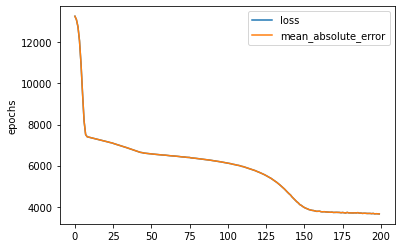

In [114]:
# Plot Loss Curve / Training Curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.ylabel('epochs')

In [115]:
 # build a Nureal Network 

 # set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API : This Groups a Linear Stack of Layers into Model.
# Method : 1
#-----------
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100 ,input_shape=[8,],name='Hidden-layer-1'),
    tf.keras.layers.Dense(10 ,name='Hidden-layer-2'),
    tf.keras.layers.Dense(1 ,name='Output-layer')
], name = 'Model-4')

#2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae ,# mae -> Mean Absolute Error between Labels and Predictions  : mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.Adam(),
              metrics =[ tf.keras.losses.mae])

# Model Summary
insurance_model_4.summary()

Model: "Model-4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-layer-1 (Dense)       (None, 100)               900       
_________________________________________________________________
Hidden-layer-2 (Dense)       (None, 10)                1010      
_________________________________________________________________
Output-layer (Dense)         (None, 1)                 11        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [116]:
# Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# Fit the Model
history=insurance_model_4.fit(X_train,y_train,epochs=500, callbacks=[callback])

Epoch 1/500
34/34 [==============================] - 0s 2ms/step - loss: 13273.5039 - mean_absolute_error: 13273.5039
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13106.1074 - mean_absolute_error: 13106.1074
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 12755.9971 - mean_absolute_error: 12755.9971
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 12074.5029 - mean_absolute_error: 12074.5029
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 10943.2764 - mean_absolute_error: 10943.2764
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 9497.8984 - mean_absolute_error: 9497.8984
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 8163.3486 - mean_absolute_error: 8163.3486
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7514.0991 - mean_absolute_error: 7514.0991
Epoch 9/500
34/34 [==============================] - 0s 2ms/st

In [117]:
# Check the results of the insurance model on the test data.
insurance_model_4.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3504.0327 - mean_absolute_error: 3504.0327


[3504.03271484375, 3504.03271484375]

Text(0, 0.5, 'epochs')

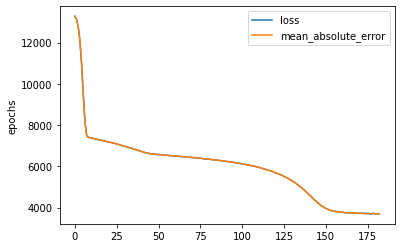

In [118]:
# Plot Loss Curve / Training Curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.ylabel('epochs')

#### Preprocessing Data (normalization and standarziation)

In terms of Scalling values, nueral networks tend to prefer normalization. If we are not sure we can try both and see which is better.

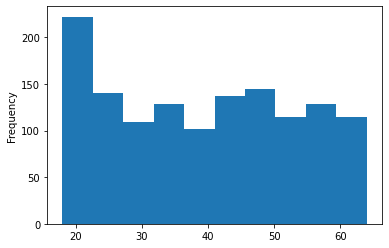

In [119]:
X['age'].plot(kind='hist')

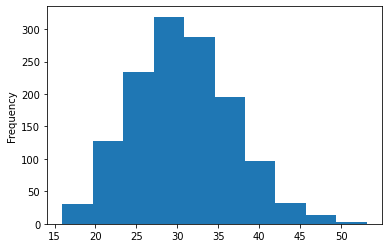

In [120]:
X['bmi'].plot(kind='hist')

In [123]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [128]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder

ct = make_column_transformer((MinMaxScaler() , ["age","bmi","children"]),
                             (OneHotEncoder(drop='first'),["sex","smoker","region"]))

# Create X and y 
X = insurance.drop("charges",axis=1)
y= insurance['charges']


# Create training and Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

ct.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop='first',
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [129]:
# transforming the Test an dTrain Data with Normalization and OneHotEncoding
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [132]:
 # build a Nureal Network 

 # set random seed 
tf.random.set_seed(42)

# 1. Create a model using the Sequential API : This Groups a Linear Stack of Layers into Model.
# Method : 1
#-----------
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100 ,input_shape=[8,],name='Hidden-layer-1'),
    tf.keras.layers.Dense(10 ,name='Hidden-layer-2'),
    tf.keras.layers.Dense(1 ,name='Output-layer')
], name = 'Model-5')

#2. Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae ,# mae -> Mean Absolute Error between Labels and Predictions  : mean(abs(y_true - y_pred))
              optimizer = tf.keras.optimizers.Adam(),
              metrics =[ tf.keras.losses.mae])

# Model Summary
insurance_model_5.summary()

Model: "Model-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-layer-1 (Dense)       (None, 100)               900       
_________________________________________________________________
Hidden-layer-2 (Dense)       (None, 10)                1010      
_________________________________________________________________
Output-layer (Dense)         (None, 1)                 11        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# Fit the Model
history=insurance_model_5.fit(X_train_normal,y_train,epochs=500, callbacks=[callback])

Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 13343.9199 - mean_absolute_error: 13343.9199
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 13337.6611 - mean_absolute_error: 13337.6611
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 13322.7861 - mean_absolute_error: 13322.7861
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 13292.0859 - mean_absolute_error: 13292.0859
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 13237.9189 - mean_absolute_error: 13237.9189
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 13152.6719 - mean_absolute_error: 13152.6719
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 13028.9424 - mean_absolute_error: 13028.9424
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 12859.5605 - mean_absolute_error: 12859.5605
Epoch 9/500
34/34 [==============================] - 0s 

In [134]:
# Check the results of the insurance model on the test data.
insurance_model_5.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3163.6101 - mean_absolute_error: 3163.6101


[3163.610107421875, 3163.610107421875]

Text(0, 0.5, 'epochs')

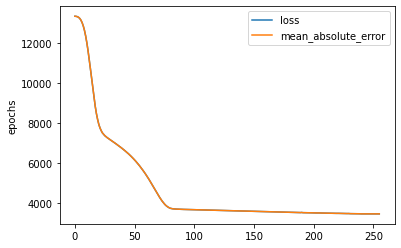

In [135]:
# Plot Loss Curve / Training Curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.ylabel('epochs')